c:\Users\afons\miniconda3\Lib\site-packages\control\freqplot.py:435: FutureWarning: bode_plot() return value of mag, phase, omega is deprecated; use frequency_response()
  warnings.warn(


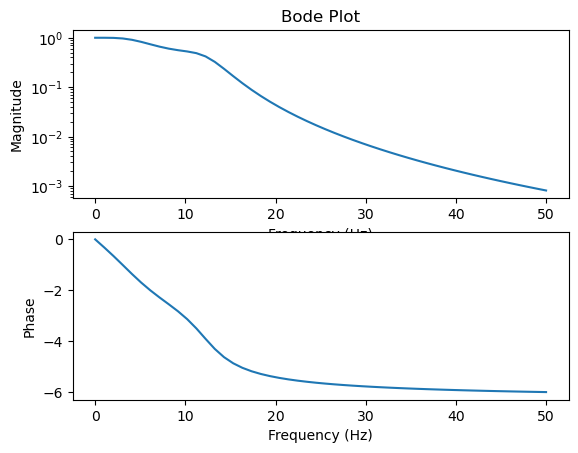

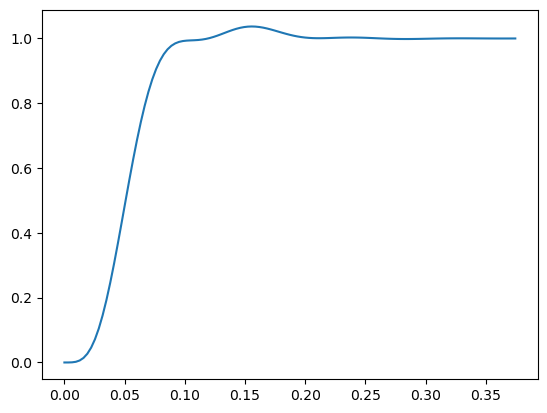

RiseTime: 0.047610425290654526
SettlingTime: 0.18091961610448723
SettlingMin: 0.9052265351913662
SettlingMax: 1.036761943235743
Overshoot: 3.676194323574311
Undershoot: 0
Peak: 1.036761943235743
PeakTime: 0.1555273892828048
SteadyStateValue: 1.0


In [1]:
# secord.py - demonstrate some standard MATLAB commands
# RMM, 25 May 09

import os
import matplotlib.pyplot as plt   # MATLAB plotting functions
import control as ct
from control.matlab import *  # MATLAB-like functions
#import math

kp=1.2993       #Pgain (kp=1.2993 V/cm)
tsv=0.0246      #Valve time constant (tsv=0.0246 s)
ksvkq=1934.5    #Valve flow gain (ksvkq=1934.5 cm3/s/V)
kpl=1.67401e-7  #Valve pressure gain & leakadge factor (kpl=1.67401e-7 m3/s/kPa)
Be=193716.28    #Oil Bulk modulus (Be=193716.28 kPa)
Vt=0.002659     #Oil Volume on actuator chamber (Vt=0.002659 m3)
A=0.012456      #Piston area (A=0.012456 m2)
mp=1.9751       #Platen mass (mp=1.9751 t)
ctm=5.78         #Total damping, actuator + platen (ct=5.78 kN s/m)
mt=5            #massa rigida

kh=4*Be*A**2/Vt                  #(kPa m)
Y0=A*kp*ksvkq/kpl*10**-4         #(10^-4 t/s^2)
Y1=ctm+A**2/kpl                  #(kN s/m = t/s)
Y2=tsv*Y1+mt*+ctm*A**2/(kpl*kh)  #(t)
Y3=mt*tsv+A**2/(kpl*kh)*mt       #(t s)
Y4=A**2/(kpl*kh)*mt*tsv          #(t s^2)


#Closed-loop transfer function
Gxr = ct.tf([Y0], [Y4, Y3, Y2, Y1, Y0], inputs='xref', outputs='xp', name='Gxpxref')

# Bode plot for the system
plt.figure(1)
plt.subplot(2, 1, 1)
mag, phase, om = bode(Gxr, linspace(0, 50*6.28), dB=False, plot=False)
#mag, phase, om = bode(Gxr, logspace(-2, 2), plot=True)
#mag, phase, om = bode(Gxr, Hz=True, dB=False, plot=True)
plt.semilogy(om/6.28, mag)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.title("Bode Plot")
plt.subplot(2, 1, 2)
plt.plot(om/6.28, phase)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Phase")

# Step response for the system
plt.figure(2)
yout, T = step(Gxr)
plt.plot(T.T, yout.T)
plt.show(block=False)

S_Gxr = ct.step_info(Gxr)
for k in S_Gxr:
    print(f"{k}: {S_Gxr[k]}")


In [2]:
[w_G, d_G, p_G]=damp(Gxr)

    Eigenvalue (pole)       Damping     Frequency
    -18.44    +76.54j        0.2342         78.73
    -18.44    -76.54j        0.2342         78.73
    -26.27     +22.5j        0.7595         34.59
    -26.27     -22.5j        0.7595         34.59


In [3]:
S_Gxr



{'RiseTime': 0.047610425290654526,
 'SettlingTime': 0.18091961610448723,
 'SettlingMin': 0.9052265351913662,
 'SettlingMax': 1.036761943235743,
 'Overshoot': 3.676194323574311,
 'Undershoot': 0,
 'Peak': 1.036761943235743,
 'PeakTime': 0.1555273892828048,
 'SteadyStateValue': 1.0}

In [4]:
P = ct.tf(1, [1, 0], inputs='u', outputs='y', name='P')

In [5]:
num = [[[1., 2.], [3., 4.]], [[5., 6.], [7., 8.]]]
den = [[[9., 8., 7.], [6., 5., 4.]], [[3., 2., 1.], [-1., -2., -3.]]]
sys1 = ct.tf(num, den)

In [6]:
ct.ss([[-1, -2], [3, -4]], [[5], [7]], [[6, 8]], [[9]])

StateSpace(array([[-1., -2.],
       [ 3., -4.]]), array([[5.],
       [7.]]), array([[6., 8.]]), array([[9.]]))